<a href="https://colab.research.google.com/github/sebasrosalesr/Sample-projects/blob/main/BTC_TrendPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-08-08 16:47:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-08-08 16:47:03 (5.15 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
#Importing time series with Pandas
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates = ["Date"], index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
len(df)

2787

In [ ]:
bitcoin_price = df["Closing Price (USD)"]

<Axes: title={'center': 'Bitcoin Price'}, xlabel='Date'>

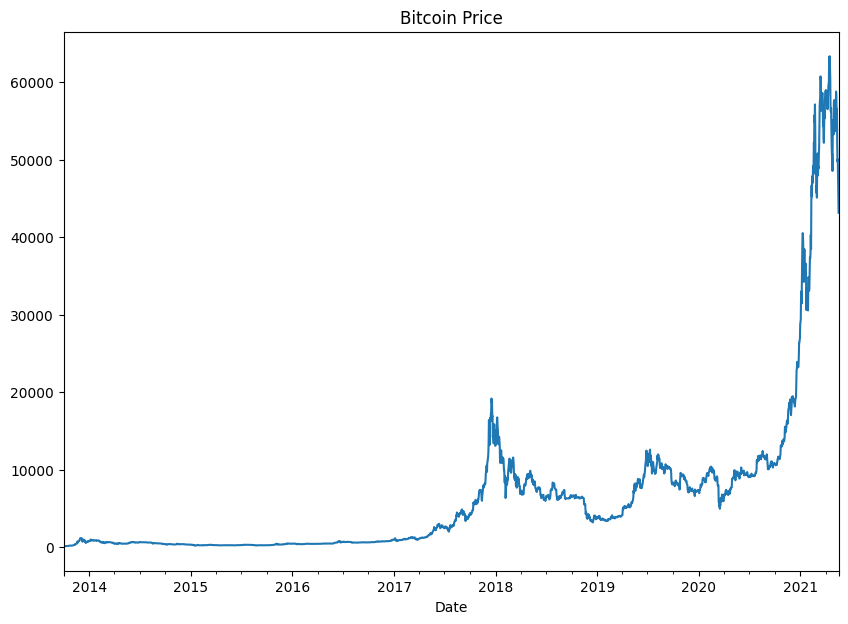

In [ ]:
bitcoin_price.plot(figsize = (10, 7), title = "Bitcoin Price")

In [ ]:
#get the bitcoin data array
time_steps = df.index.to_numpy()
prices = df['Closing Price (USD)'].to_numpy()

In [ ]:
time_steps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

## Create a test data set that simulate the future

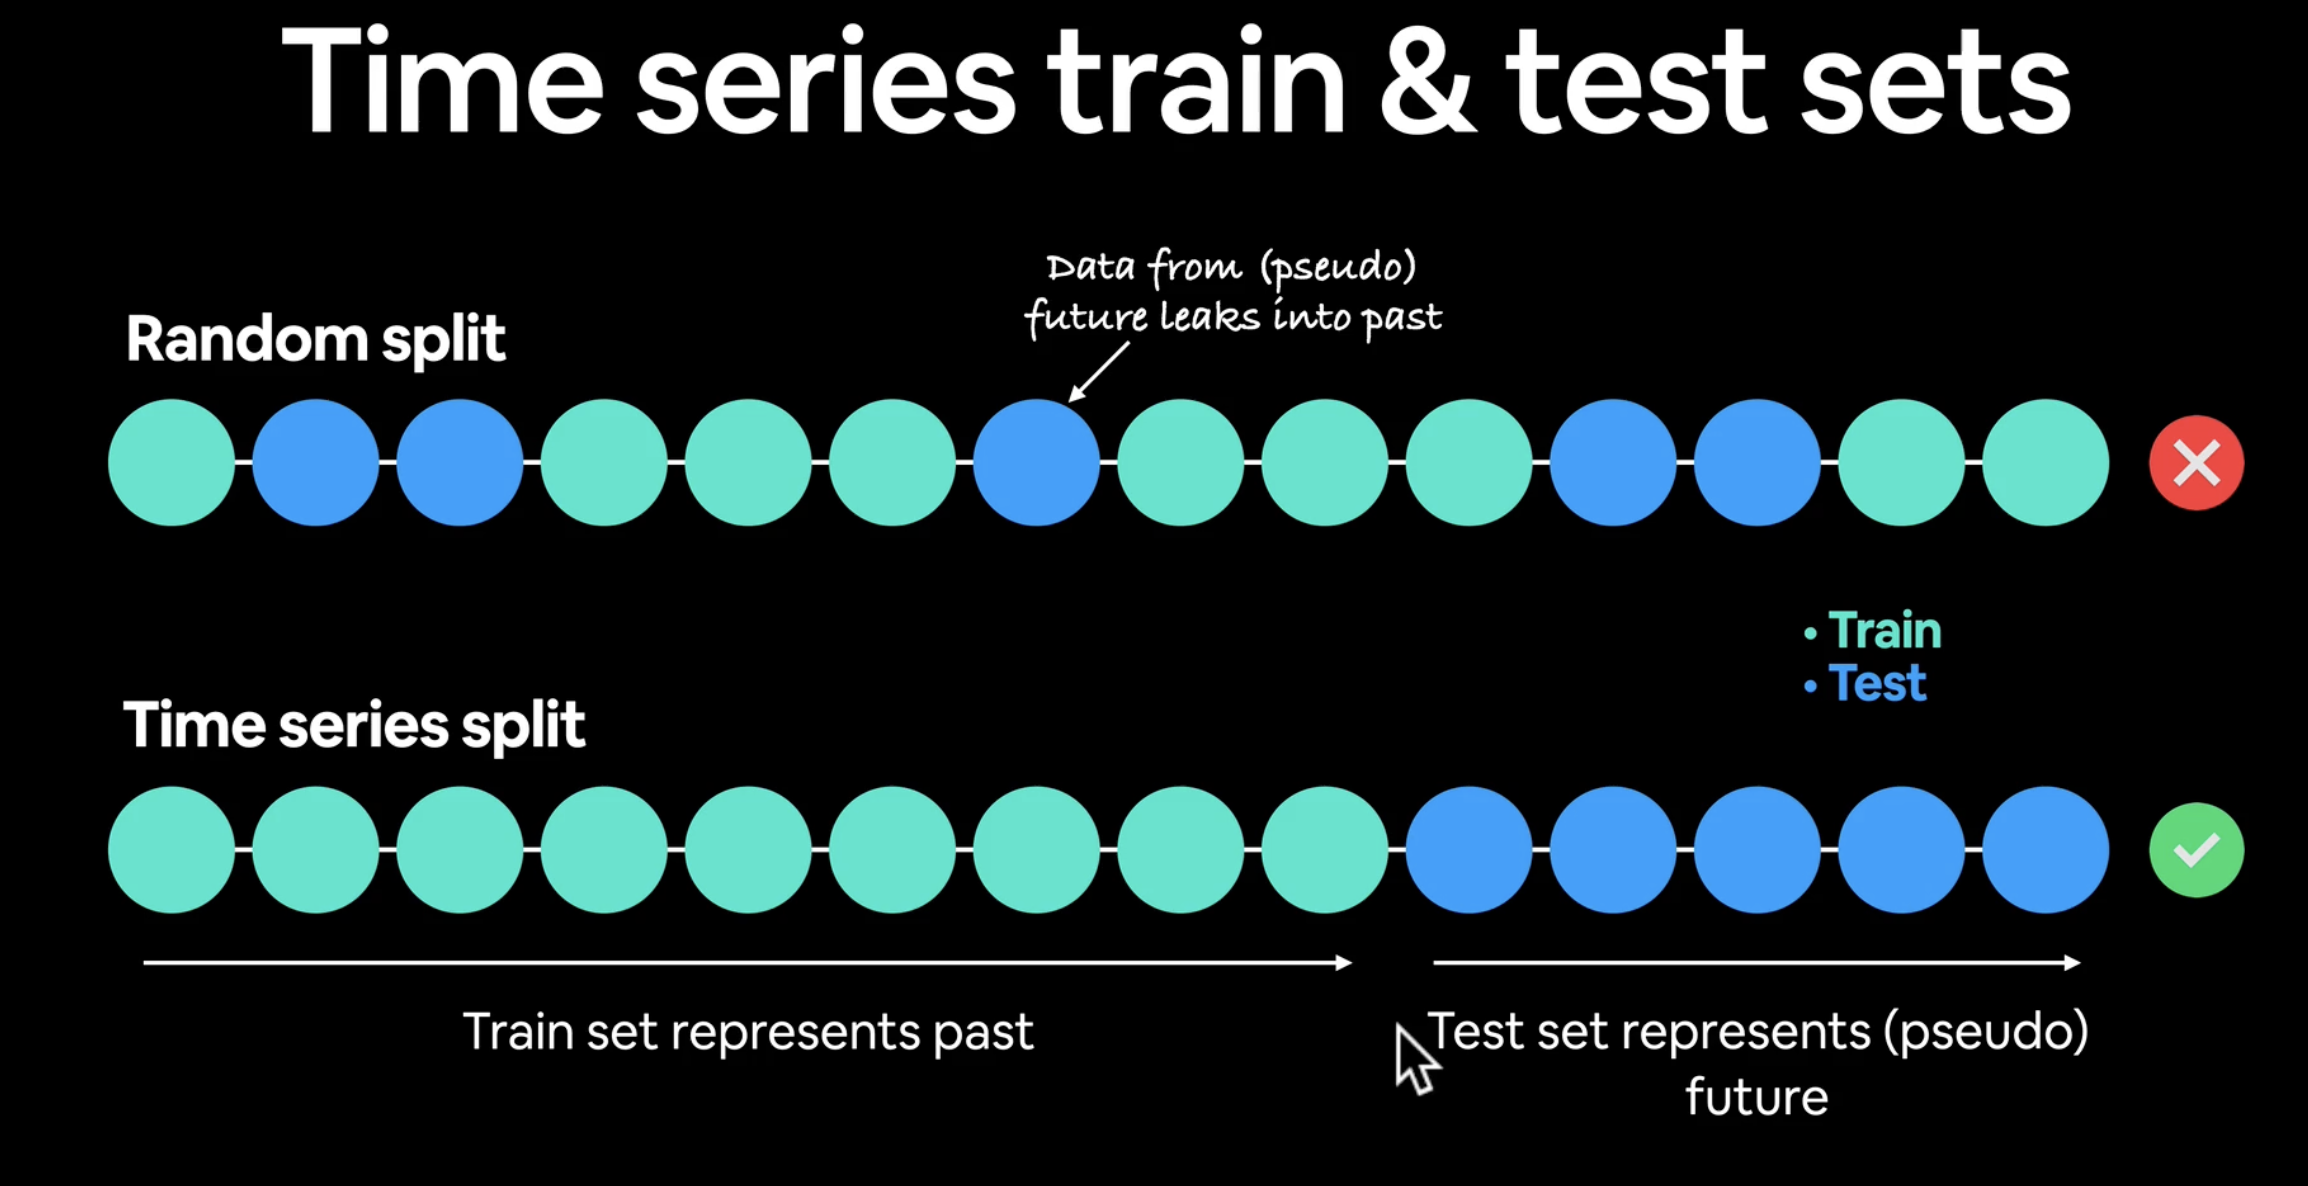

In [ ]:
split_size = int(0.8 * len(prices)) # 80% Train and 20% Test

#X and Y splits
X_train, y_train = time_steps[:split_size], prices[:split_size]
X_test, y_test = time_steps[split_size:], prices[split_size:]

#check lenghts
print(len(X_train), len(y_train), len(X_test), len(y_test))

2229 2229 558 558


<Figure size 1000x700 with 0 Axes>

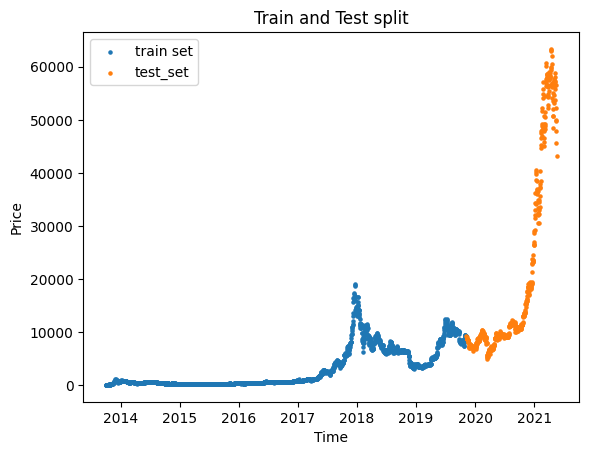

In [ ]:
import matplotlib.pyplot as plt
#plot the splits
plt.figure(figsize=(10, 7))
plt.figure()
plt.scatter(X_train, y_train, s=5, label='train set')
plt.scatter(X_test, y_test, s=5, label='test_set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Train and Test split')
plt.show();

In [ ]:
import matplotlib.pyplot as plt

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (similar to start but for the end)
    label : label to show on plot about values, default None
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)  # make label bigger
    plt.grid(True)


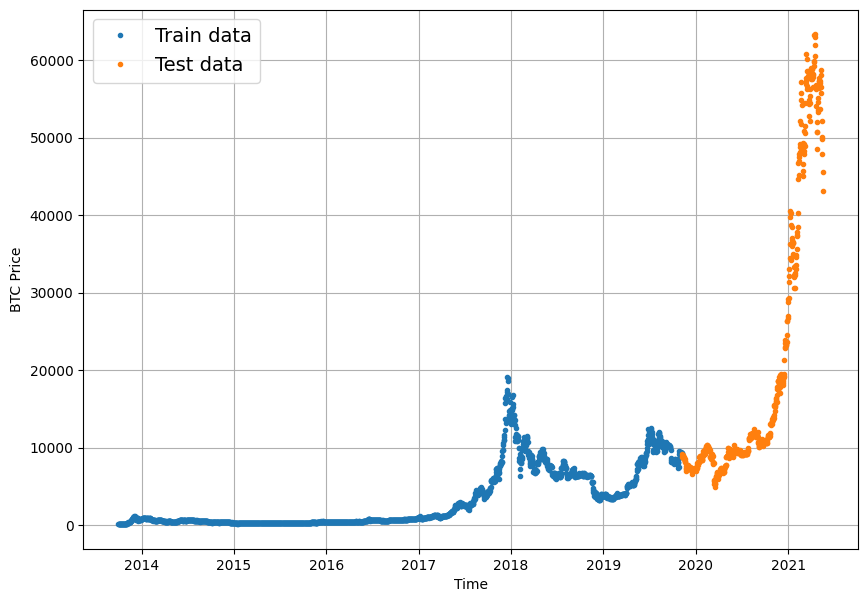

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")
plt.show()

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:
* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## MODEL 0 Naive forecast

MASE (Mean Absolute Scaled Error) is a measure used to evaluate the accuracy of forecasts. It scales the mean absolute error (MAE) by the MAE of a naïve forecast method, often using the seasonal naïve forecast. This makes it easy to interpret and compare across different datasets and models.

Definition:

 \text{MASE} = \frac{\text{MAE}}{\text{MAE of naïve forecast}}

Key Points:

	1.	Interpretation:
	•	MASE > 1: The forecasting model is worse than the naïve model.
	•	MASE < 1: The forecasting model is better than the naïve model.
	•	MASE = 1: The forecasting model is equivalent to the naïve model.
	2.	Robustness:
	•	It is scale-independent, making it useful for comparing forecast performance across different datasets.
	•	It can handle different types of data, including those with seasonality, by choosing an appropriate naïve forecast.
	3.	Calculation:
	•	Step 1: Calculate the MAE of the forecast model.
	•	Step 2: Calculate the MAE of the naïve forecast model (often using the previous period’s value for each prediction).
	•	Step 3: Compute the ratio of the two MAEs.


In [ ]:
naive_forecast = y_test[:-1]

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Scaled Error (MASE).

    Args:
    y_true: Array of true values.
    y_pred: Array of predicted values.

    Returns:
    mase: Mean Absolute Scaled Error.
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Calculate naive forecast
    naive_forecast = y_true[1:]
    mae_naive = tf.reduce_mean(tf.abs(y_true[:-1] - naive_forecast))

    mase = mae / mae_naive
    return mase


In [ ]:
# model metrics dictionary
def evaluate_model(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    mae_metric.update_state(y_true, y_pred)
    mse_metric.update_state(y_true, y_pred)
    mape_metric.update_state(y_true, y_pred)

    mae = mae_metric.result().numpy()
    mse = mse_metric.result().numpy()
    rmse = tf.sqrt(mse_metric.result()).numpy()
    mape = mape_metric.result().numpy()
    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

    return {"mae": mae,
            "mse": mse,
            "rmse": rmse,
            "mape": mape,
            "mase": mase}

In [ ]:
naive_results = evaluate_model(y_true = y_test[1:], y_pred= naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

##Format data part II: Window our data set

Why do we window

We window our data to turn into a supervised learning problem

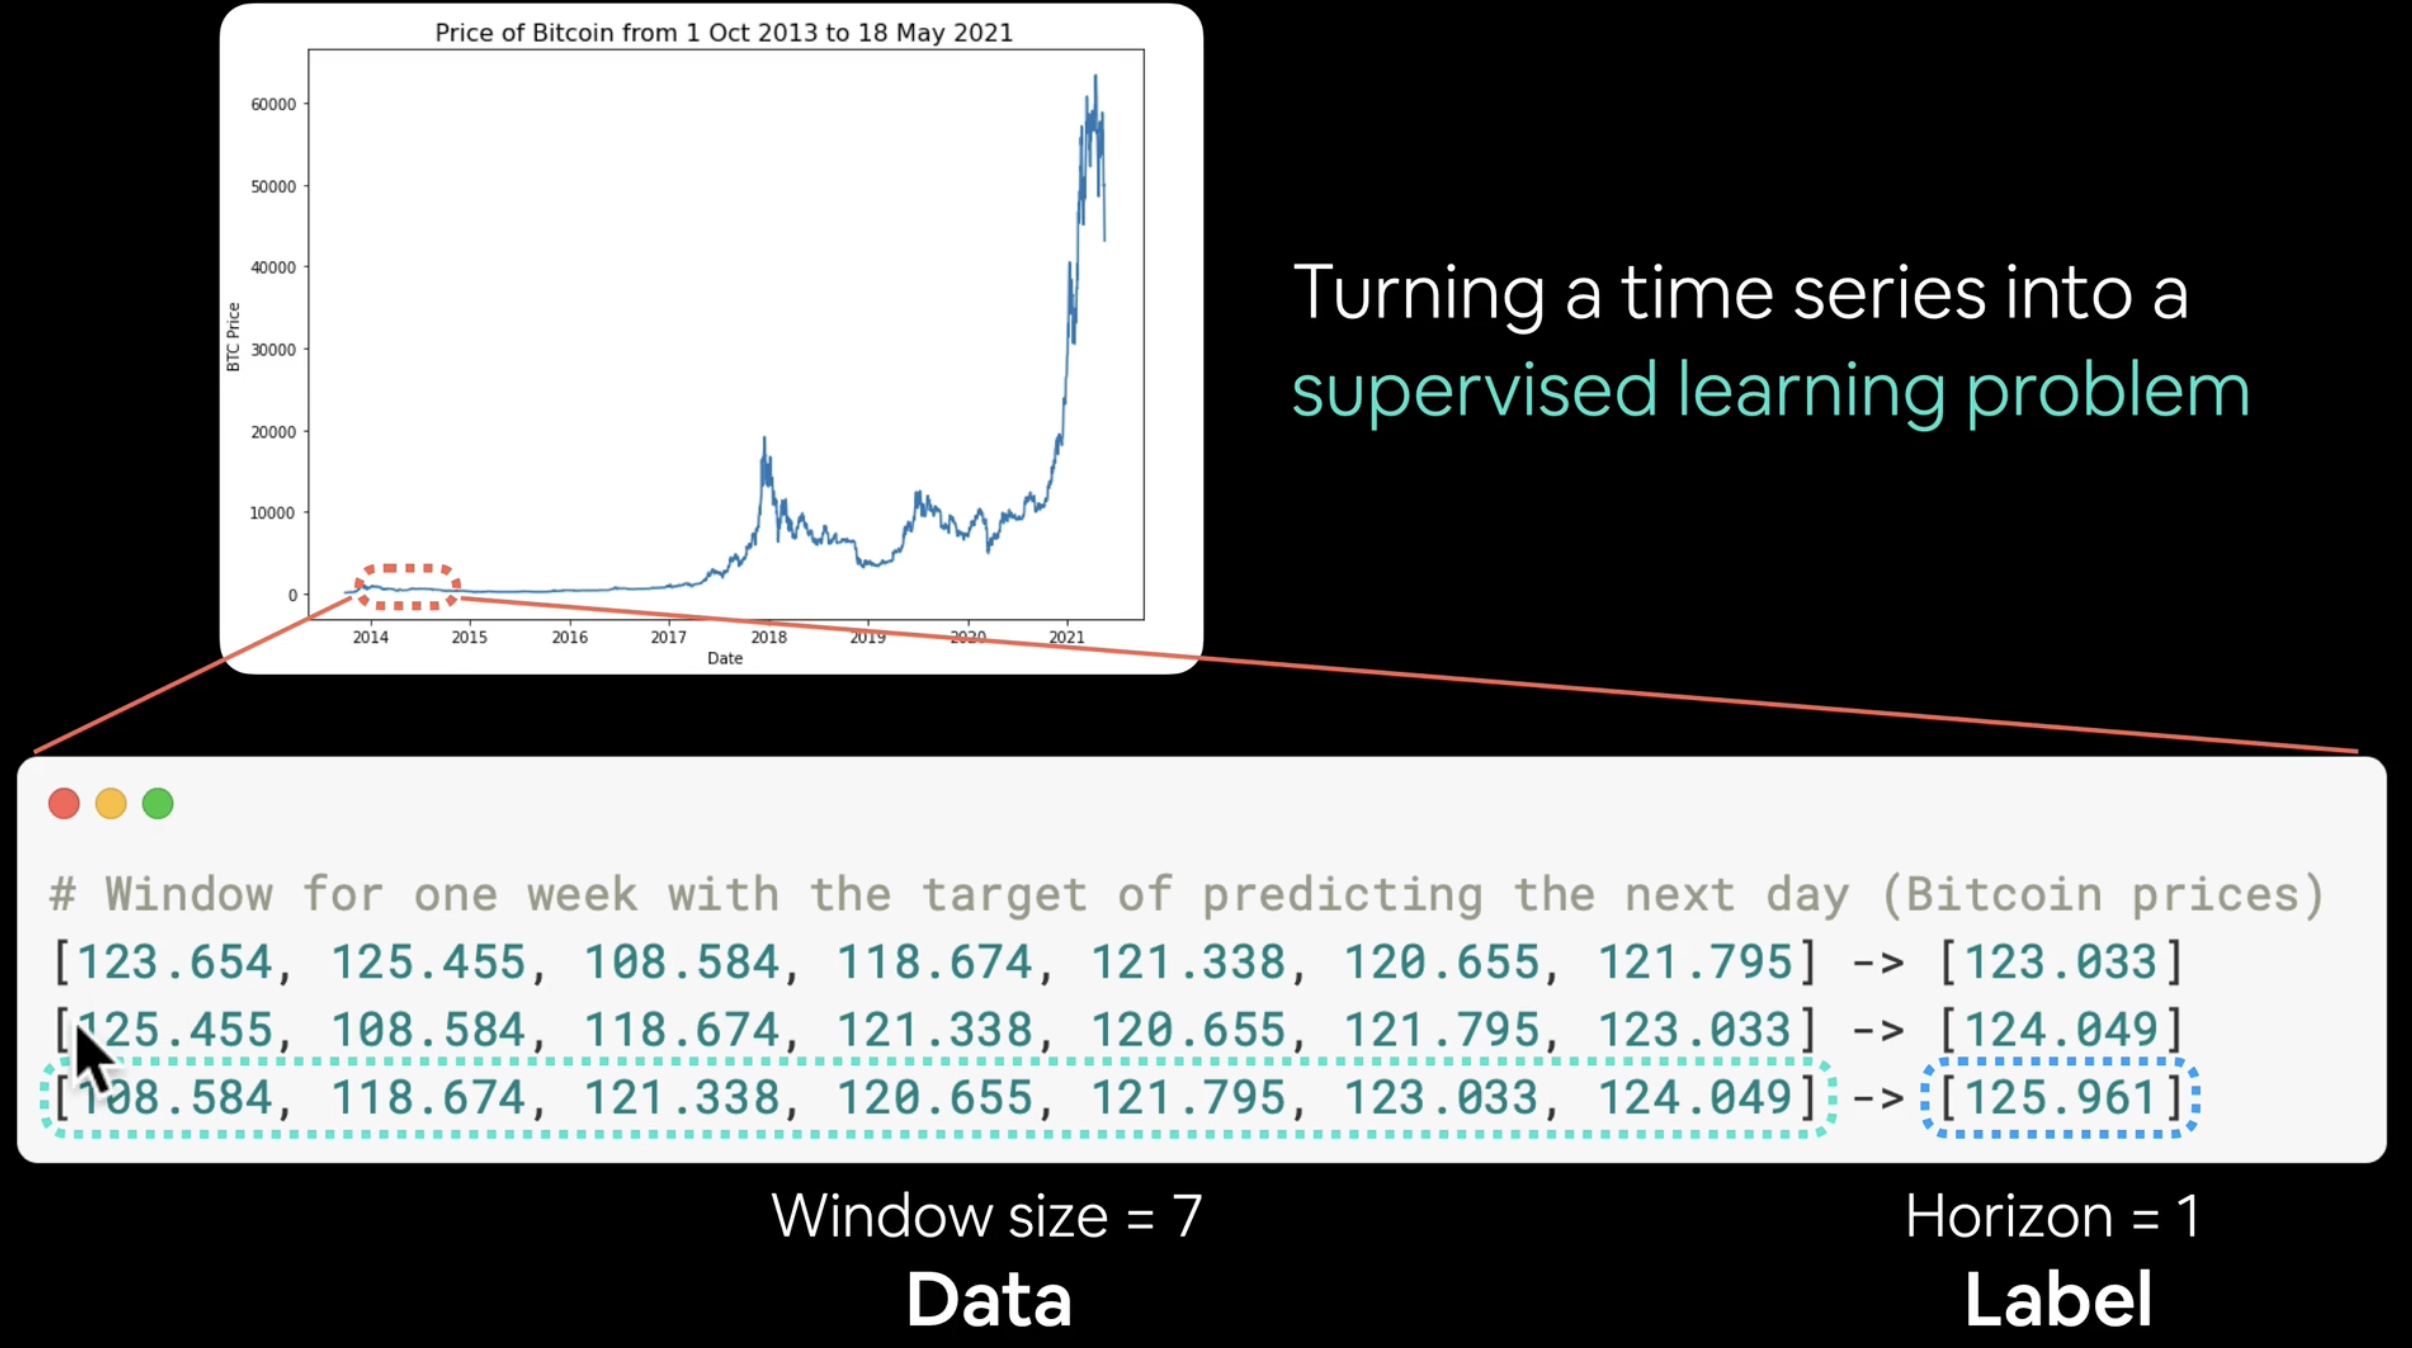

To apply it across our entire time series, we need a more efficient approach. Using Python for loops for large time series would be too slow.

To speed things up, we can leverage NumPy’s array indexing. More information can be found in the NumPy array indexing documentation.

Our function will:

	1.	Create a window step of a specific window size (e.g., [0, 1, 2, 3, 4, 5, 6]).
	2.	Use NumPy indexing to create a 2D array of multiple window steps. For example:
[[0, 1, 2, 3, 4, 5, 6],

 [1, 2, 3, 4, 5, 6, 7],

 [2, 3, 4, 5, 6, 7, 8]]

In [ ]:
#let's set up global variables for windows horizon size
HORIZON = 1 #predict one day
WINDOW_SIZE = 7 #look back 7 days

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

def get_labelled_windows(x, horizon=HORIZON):
    """
    Splits the windowed array into windows and labels
    """
    return x[:, :-horizon], x[:, -horizon:]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
#view the first 3 labels
for i in range(3):
    print(f"window {full_windows[i]} --> horizon: {full_labels[i]}")


window [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> horizon: [123.033]
window [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> horizon: [124.049]
window [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> horizon: [125.96116]


In [ ]:
#view the lasr 3 labels
for i in range(3):
    print(f"window {full_windows[i-3]} --> horizon: {full_labels[i-3]}")

window [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> horizon: [47885.62525472]
window [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> horizon: [45604.61575361]
window [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> horizon: [43144.47129086]


## Traing windows into train and test sets

In [ ]:
#make train test splits
def train_test_split(windows, labels, split_size=0.2):
    """
    Splits the dataset into train and test sets
    """
    split_size = int(len(windows) * (1 - split_size))
    train_window = windows[:split_size]
    train_labels = labels[:split_size]
    test_window = windows[split_size:]
    test_labels= labels[split_size:]
    return train_window, test_window, train_labels, test_labels

In [ ]:
#create train and test splits
train_windows, test_windows, train_labels, test_labels = train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## Make a Modelling Checkpoint Callback

Because our model’s performance will fluctuate from experiment to experiment, we’re going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model’s best performances against the other model’s best performances.

For example, if our model performs the best on epoch 55 (but we’re training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:

TensorFlow ModelCheckpoint Documentation

In [ ]:
import os

def create_model_checkpoint(model_name):
    checkpoint_path = f"model_experiments/{model_name}.keras"
    return tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_best_only=True,
                                              save_weights_only=False,
                                              monitor='val_loss',
                                              verbose=1)


## MODEL_1 using Dense model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:

	•	A single dense layer with 128 hidden units and ReLU activation
	•	An output layer with linear activation (no activation)
	•	Adam optimization and MAE loss function
	•	Batch size of 128 (previously we’ve used 32)
	•	100 epochs


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name='model_1_dense')

#compile the model
model_1.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae','mse'])

#fit the model
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name= model_1.name)])

Epoch 1/100
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1518.8923 - mae: 1518.8923 - mse: 6539641.5000
Epoch 1: val_loss improved from inf to 2400.39990, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 1422.5676 - mae: 1422.5676 - mse: 6000829.0000 - val_loss: 2400.3999 - val_mae: 2400.3999 - val_mse: 14119285.0000
Epoch 2/100
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 303.4901 - mae: 303.4901 - mse: 329775.4375
Epoch 2: val_loss improved from 2400.39990 to 1061.00220, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 298.8315 - mae: 298.8315 - mse: 323162.4062 - val_loss: 1061.0022 - val_mae: 1061.0022 - val_mse: 3689873.2500
Epoch 3/100
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 192.6852 - mae: 192.6852 - mse: 173611.0000  
Epoch 3: val_loss did not improve from 1061.00220
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 194.4825 - mae: 194.4825 - mse: 180625.3281 - v

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 282.7879 - mae: 282.7879 - mse: 344213.0625


[566.716796875, 566.716796875, 1166036.125]

In [ ]:
#load in the best performer model
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense.keras')
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.3025 - mae: 282.3025 - mse: 344444.2812 


[566.4032592773438, 566.4032592773438, 1164744.125]

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## make forecasting with the model(on the test dataset)


In [ ]:
#make preds
def make_preds(model, input_data):
    """
    Uses a trained model to make predictions on input data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) #Return 1D array

In [ ]:
make_1_preds = make_preds(model_1, test_windows)
make_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8846.855 , 8782.873 , 9041.78  , 8761.946 , 8714.7295, 8737.958 ,
       8678.0205, 8515.264 , 8449.901 , 8529.564 ], dtype=float32)>

In [ ]:
#Evaluate preds
model_1_results = evaluate_model(test_labels, make_1_preds)
model_1_results

{'mae': 566.4033,
 'mse': 1164744.0,
 'rmse': 1079.233,
 'mape': 2.528747,
 'mase': 30.119331}

In [ ]:
naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

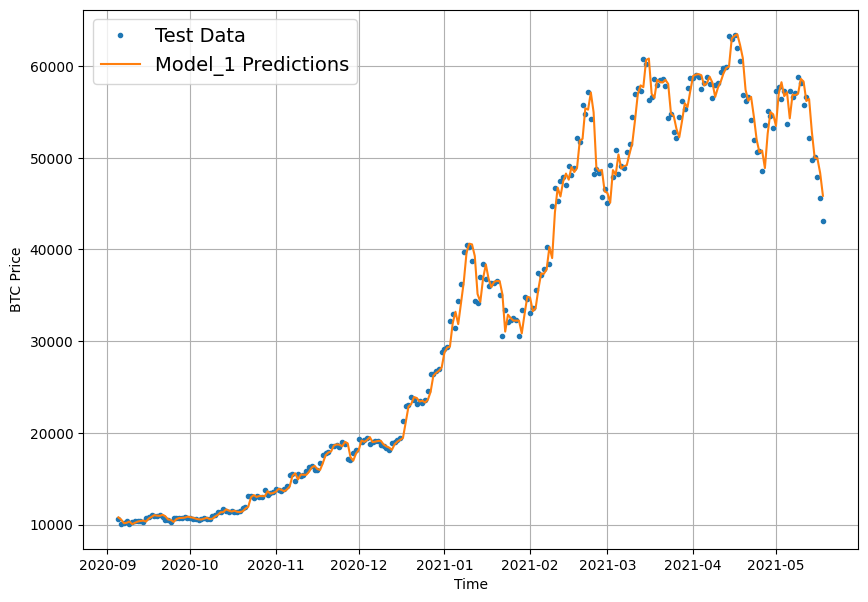

In [ ]:
# Plot Model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=make_1_preds, start=offset, format='-', label="Model_1 Predictions")
plt.show()

## MODEL_2: Dense(Window=30, horizon=1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30 # use 30 time steps

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
#make train and test windows
train_windows, test_windows, train_labels, test_labels = train_test_split(windows=full_windows, labels=full_labels, split_size=.2)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
#Create a model_2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name='model_2_dense')

#compile the model
model_2.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae','mse'])

#fit the model
history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 561.3424 - mae: 561.3424 - mse: 1373211.5000
Epoch 1: val_loss improved from inf to 1352.59949, saving model to model_experiments/model_2_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 553.1801 - mae: 553.1801 - mse: 1335917.1250 - val_loss: 1352.5995 - val_mae: 1352.5995 - val_mse: 5078804.5000
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 256.5239 - mae: 256.5239 - mse: 272488.3750
Epoch 2: val_loss did not improve from 1352.59949
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 307.5398 - mae: 307.5398 - mse: 376027.7188 - val_loss: 1984.1989 - val_mae: 1984.1989 - val_mse: 9753162.0000
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 328.3784 - mae: 328.3784 - mse: 365231.5312
Epoch 3: val_loss improved from 1352.59949 to 968.59113, saving model to model_experiments/model_2_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 269.8476 - mae: 269.8476 - mse: 290455.7812 - val_loss: 

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.0834 - mae: 310.0834 - mse: 371885.7812


[613.8121948242188, 613.8121948242188, 1260255.125]

In [ ]:
#load best epoch model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense.keras')
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 304.7866 - mae: 304.7866 - mse: 367718.5625 


[604.1824340820312, 604.1824340820312, 1232230.5]

In [ ]:
#get forcast predictions
make_2_preds = make_preds(model_2, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model_2_results = evaluate_model(test_labels, make_2_preds)
model_2_results

{'mae': 604.18243,
 'mse': 1232230.5,
 'rmse': 1110.0588,
 'mape': 2.7352724,
 'mase': 30.1271}

In [ ]:
model_1_results

{'mae': 566.4033,
 'mse': 1164744.0,
 'rmse': 1079.233,
 'mape': 2.528747,
 'mase': 30.119331}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

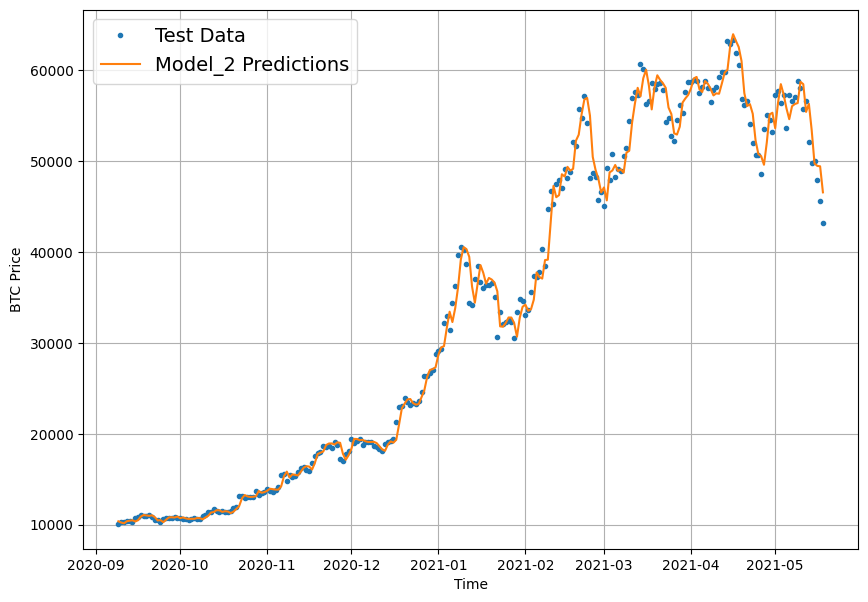

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=make_2_preds, start=offset, format='-', label="Model_2 Predictions")
plt.show()

## MODEL_3

WINDOW_SIZE = 30
HORIZON = 7

In [ ]:
WINDOW_SIZE = 30
HORIZON = 7

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = train_test_split(windows=full_windows, labels=full_labels, split_size=.2)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

#Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
    ], name='model_3_dense')

#compile the model
model_3.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae','mse'])

#fit the model
history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1955.5768 - mae: 1955.5768 - mse: 15846644.0000
Epoch 1: val_loss improved from inf to 2999.28052, saving model to model_experiments/model_3_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1882.9347 - mae: 1882.9347 - mse: 15027142.0000 - val_loss: 2999.2805 - val_mae: 2999.2805 - val_mse: 23106122.0000
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 678.4019 - mae: 678.4019 - mse: 2201633.5000
Epoch 2: val_loss improved from 2999.28052 to 2158.78955, saving model to model_experiments/model_3_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 559.5314 - mae: 559.5314 - mse: 1402706.8750 - val_loss: 2158.7896 - val_mae: 2158.7896 - val_mse: 13961173.0000
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 519.8252 - mae: 519.8252 - mse: 1689188.5000
Epoch 3: val_loss improved from 2158.78955 to 1948.01685, saving model to model_experiments/model_3_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 614.5676 - mae: 614.5676 - mse: 1534986.1250


[1223.1240234375, 1223.1240234375, 5224837.0]

In [ ]:
#load the best version of model_3
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense.keras')
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 621.9392 - mae: 621.9392 - mse: 1535401.8750  


[1218.9046630859375, 1218.9046630859375, 5223296.5]

In [ ]:
model_3_preds = make_preds(model_3, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
model_3_results = evaluate_model(test_labels, model_3_preds)
model_3_results

{'mae': 1218.9047,
 'mse': 5223296.0,
 'rmse': 2285.4531,
 'mape': 5.5276937,
 'mase': 2.168972}

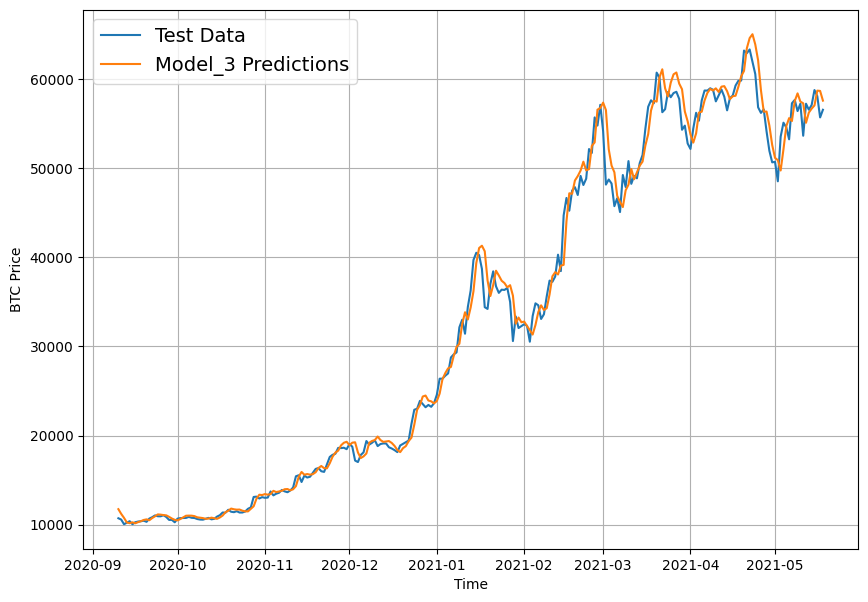

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format='-', label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label="Model_3 Predictions")
plt.show()

## Comparing resutls

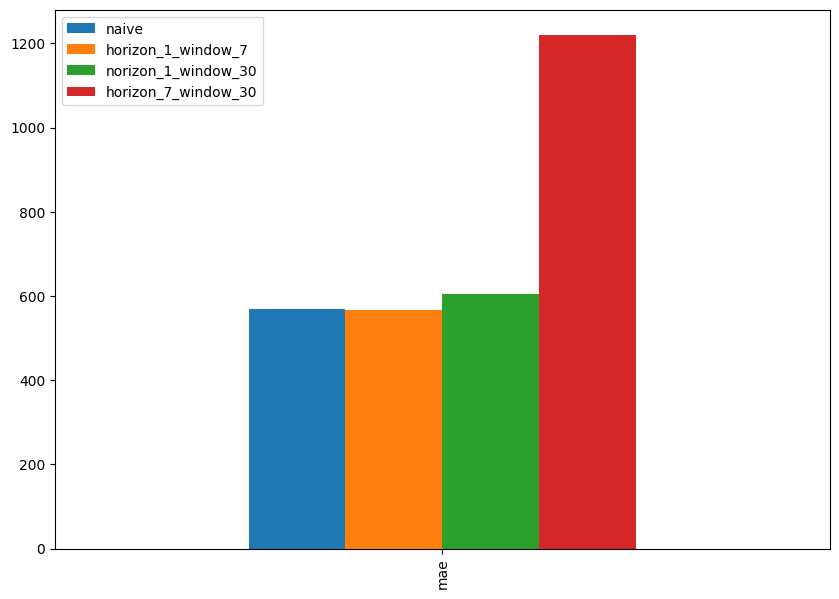

In [ ]:
pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7': model_1_results['mae'],
              'norizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar');

## MODEL_4: Conv1D



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Crate a window data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
#Create a train and test sets
train_windows, test_windows, train_labels, test_labels = train_test_split(windows=full_windows, labels=full_labels, split_size=.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
x.shape

TensorShape([7])

In [ ]:
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))

In [ ]:
expand_dim_layer(x).shape

TensorShape([7, 1])

In [ ]:
#Create a Conv1D

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1 ,padding='causal', activation='relu'),
    layers.Dense(HORIZON)
    ], name='model_4_conv1d')

#compile
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
#fit the model
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3211.2090 - mae: 3211.2090 - mse: 24908832.0000
Epoch 1: val_loss improved from inf to 12466.66895, saving model to model_experiments/model_4_conv1d.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3150.3645 - mae: 3150.3645 - mse: 24115902.0000 - val_loss: 12466.6689 - val_mae: 12466.6689 - val_mse: 292195552.0000
Epoch 2/100
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1629.4271 - mae: 1629.4271 - mse: 7585438.0000  
Epoch 2: val_loss improved from 12466.66895 to 5921.75439, saving model to model_experiments/model_4_conv1d.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1556.9226 - mae: 1556.9226 - mse: 7165596.5000 - val_loss: 5921.7544 - val_mae: 5921.7544 - val_mse: 95032648.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 889.9130 - mae: 889.9130 - mse: 2974871.2500   
Epoch 3: val_loss improved from 5921.75439 to 4173.23291, saving model to model_experiments/model_4_conv1d.keras
18/18 ━━━━━━━━━

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 596.3746 - mae: 596.3746 - mse: 1478057.7500


[1216.9427490234375, 1216.9427490234375, 5087993.5]

In [ ]:
model_4_preds = make_preds(model_4, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
model_4_results = evaluate_model(test_labels, model_4_preds)
model_4_results

{'mae': 1216.9427,
 'mse': 5087993.0,
 'rmse': 2255.658,
 'mape': 5.381347,
 'mase': 2.1378314}

##MODEL_5: RNN(LSTM)

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the input layer with the appropriate shape
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))(inputs)
x = layers.LSTM(128, activation='relu', return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)


# Create the model
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_lstm")

# Compile the model
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2468.1284 - mae: 2468.1284 - mse: 15564300.0000
Epoch 1: val_loss improved from inf to 4277.36670, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 2391.5979 - mae: 2391.5979 - mse: 14901100.0000 - val_loss: 4277.3667 - val_mae: 4277.3667 - val_mse: 40948324.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 450.3065 - mae: 450.3065 - mse: 787406.6875
Epoch 2: val_loss improved from 4277.36670 to 1129.55676, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 443.4262 - mae: 443.4262 - mse: 770546.3125 - val_loss: 1129.5568 - val_mae: 1129.5568 - val_mse: 3606488.2500
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 202.8078 - mae: 202.8078 - mse: 193205.2344
Epoch 3: val_loss did not improve from 1129.55676
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 204.4363 - mae: 204.4363 - mse: 196531.8594 - v

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 347.3072 - mae: 347.3072 - mse: 483492.6562


[695.2706909179688, 695.2706909179688, 1631586.75]

In [ ]:
model_5_preds = make_preds(model_5, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [ ]:
model_5_results = evaluate_model(test_labels, model_5_preds)
model_5_results

{'mae': 695.2706,
 'mse': 1631586.9,
 'rmse': 1277.3358,
 'mape': 3.122094,
 'mase': 30.107433}

## Make a multivariate time series dataset

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices.columns

Index(['Price'], dtype='object')

In [ ]:

# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


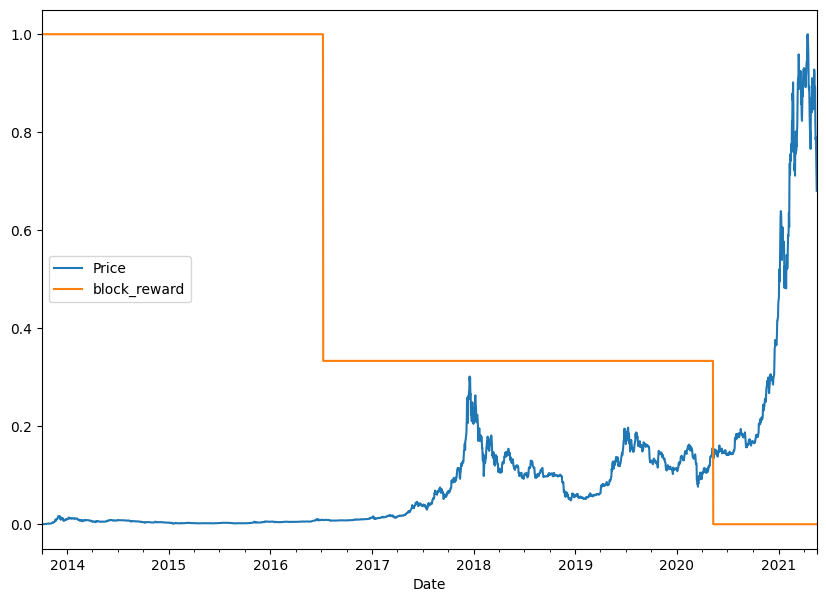

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed datasets with pandas

In [ ]:
#setuo hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

#add windowed columns
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# create x (windows) and y (horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)


In [ ]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [ ]:
#make train and test sets using indexing
split_size = int(len(X) * .8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X_train, y_train

(            block_reward      Price+1      Price+2      Price+3      Price+4  \
 Date                                                                           
 2013-10-08          25.0   121.794998   120.655327   121.338661   118.674660   
 2013-10-09          25.0   123.032997   121.794998   120.655327   121.338661   
 2013-10-10          25.0   124.049004   123.032997   121.794998   120.655327   
 2013-10-11          25.0   125.961159   124.049004   123.032997   121.794998   
 2013-10-12          25.0   125.279663   125.961159   124.049004   123.032997   
 ...                  ...          ...          ...          ...          ...   
 2019-11-05          12.5  9202.415039  9290.896484  9197.632812  9131.410156   
 2019-11-06          12.5  9369.627930  9202.415039  9290.896484  9197.632812   
 2019-11-07          12.5  9326.599609  9369.627930  9202.415039  9290.896484   
 2019-11-08          12.5  9335.751953  9326.599609  9369.627930  9202.415039   
 2019-11-09          12.5  9

## Model_6

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name='model_6_dense')

#compile the model
model_6.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae','mse'])
model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


Epoch 1/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 2840.9331 - mae: 2840.9331 - mse: 16693665.0000
Epoch 1: val_loss improved from inf to 2836.42139, saving model to model_experiments/model_6_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1688.4904 - mae: 1688.4904 - mse: 8329176.5000 - val_loss: 2836.4214 - val_mae: 2836.4214 - val_mse: 18528626.0000
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - loss: 525.7207 - mae: 525.7207 - mse: 663446.3125
Epoch 2: val_loss improved from 2836.42139 to 1083.91455, saving model to model_experiments/model_6_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 338.6810 - mae: 338.6810 - mse: 403435.7812 - val_loss: 1083.9146 - val_mae: 1083.9146 - val_mse: 3906927.5000
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 182.4400 - mae: 182.4400 - mse: 126198.4062
Epoch 3: val_loss improved from 1083.91455 to 1073.42749, saving model to model_experiments/model_6_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 286.6086 - mae: 286.6086 - mse: 349675.1250


[573.0869140625, 573.0869140625, 1182025.5]

In [ ]:
load_model_6 = tf.keras.models.load_model('model_experiments/model_6_dense.keras')
load_model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 285.1657 - mae: 285.1657 - mse: 349652.3438 


[570.8652954101562, 570.8652954101562, 1177692.125]

In [ ]:
model_6_preds = make_preds(load_model_6, X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
model_6_results = evaluate_model(y_test, model_6_preds)
model_6_results

{'mae': 570.8653,
 'mse': 1177692.1,
 'rmse': 1085.2152,
 'mape': 2.5684345,
 'mase': 1.0028522}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 566.4033,
 'mse': 1164744.0,
 'rmse': 1079.233,
 'mape': 2.528747,
 'mase': 30.119331}

## N-BEATS basic block

In [ ]:
import tensorflow as tf

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int, **kwargs):
        super().__init__(**kwargs)  # the **kwargs argument takes care of all the arguments for the parent layer
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of fully connected layers each with ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [ ]:
#Set up dummies NBeatsBlock
tf.random.set_seed(42)
dummy_nbeats = NBeatsBlock(input_size=WINDOW_SIZE,
                           theta_size=WINDOW_SIZE + HORIZON,
                           horizon=HORIZON,
                           n_neurons=128,
                           n_layers=4)

In [ ]:
#Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
#pass inputs to the dummy NBeatsBlock layer
dummy_backcast, dummy_forecast = dummy_nbeats(dummy_inputs)
dummy_backcast, dummy_forecast


(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.27189365,  0.71897435, -0.10935874, -0.2729956 ,  0.26514456,
         -0.32709238, -1.0441365 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.15687378]], dtype=float32)>)

In [ ]:
#Preparing data for the N-Beats algorithm

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
#Add a windowed column
bitcoin_prices_windowed = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
#Make feature labels
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

#Make train and test sets
split_size = int(len(X) * .8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
#train features data set
train_feature_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_label_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_feature_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_label_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_feature_dataset, train_label_dataset))
test_dataset = tf.data.Dataset.zip((test_feature_dataset, test_label_dataset))

#batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [ ]:
# setting hyperparameters
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Building, compiling, and fitting the N-BEATS algorithm

1. **Setup an instance of the N-BEATS block layer using `NBeatsBlock`**  
   This'll be the initial block used for the network, the rest will be created as part of stacks.

2. **Create an input layer for the N-BEATS stack**  
   We'll be using the Keras Functional API.

3. **Make the initial backcast and forecasts for the model with the layer created in (1)**

4. **Use for loop to create stacks of block layers**

5. **Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts**

6. **Create the double residual stacking using subtract and add layers**

7. **Put the model inputs and outputs together using `tf.keras.Model()`**

8. **Compile the model with MAE loss**  
   The paper uses multiple losses but we'll use MAE to keep it in line with our other models. Use the Adam optimizer with default setting as per section 5.2 of N-BEATS paper.

9. **Fit the N-BEATS model for 5000 epochs**  
   Since it's fitting for so many epochs, we'll use a couple of callbacks:
   - **Early Stopping**: Because the model will be training for so long, we'll stop it early if it stops improving.
   - **Reduce LR on Plateau**: If a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time.

In [ ]:
#Building and compiling the model
%%time

tf.random.set_seed(42)

# Create a N-BEATS
nbeats_block = NBeatsBlock(input_size=INPUT_SIZE,
                           theta_size=THETA_SIZE,
                           horizon=HORIZON,
                           n_neurons=N_NEURONS,
                           n_layers=N_LAYERS,
                           name='initial_block')


#Create input stack
inputs = layers.Input(shape=(INPUT_SIZE,), name='stack_input')

#Create initial backcast and forecast inputs
residuals, forecast = nbeats_block(inputs)

#Create stacks of blocks
for i, _ in enumerate(range(N_STACKS - 1)):
    backcast, block_forecast = NBeatsBlock(input_size=WINDOW_SIZE,
                                           theta_size=WINDOW_SIZE + HORIZON,
                                           horizon=HORIZON,
                                           n_neurons=N_NEURONS,
                                           n_layers=N_LAYERS,
                                           name=f'NBeatsblock_{i}')(residuals) #pass in the residuals


#Create double residuals stacking
residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

#Put the model together
model_7 = tf.keras.Model(inputs, forecast, name='model_7_nbeats')

#Compile the model
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam()
                )
#fit the model
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            batch_size=BATCH_SIZE,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=100, verbose=1)])



Epoch 923: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1111: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1211: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 16min 59s, sys: 46.1 s, total: 17min 45s
Wall time: 11min 30s


In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 579.7773


579.77734375

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


In [ ]:
model_7_results = evaluate_model(y_test, model_7_preds)
model_7_results

{'mae': 579.77734,
 'mse': 1167782.5,
 'rmse': 1080.6399,
 'mape': 2.6492722,
 'mase': 1.0185082}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

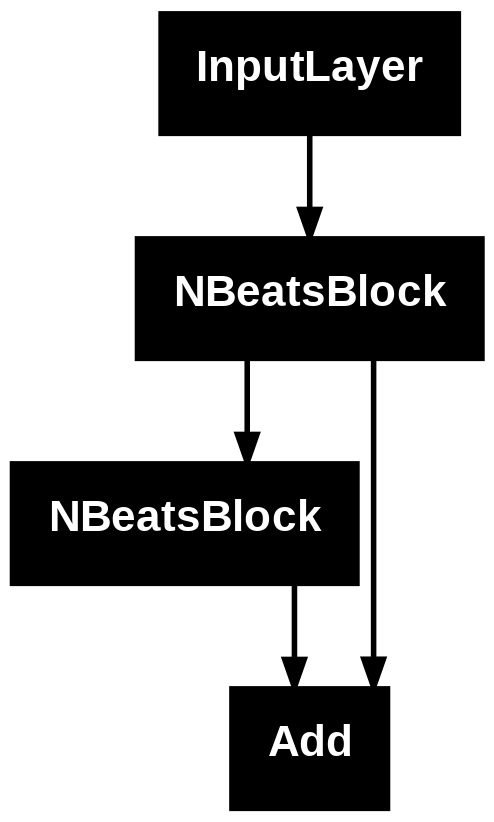

In [ ]:
from keras.utils import plot_model
plot_model(model_7)

## MODEL_8: Ensamble


In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


In [ ]:
%%time
# Get ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 109: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 422: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 522: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 170: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 393: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 493: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 113: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 964: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 304: ReduceLROnPl

In [ ]:
def ensamble_preds(models, test_data):
  ensamble_preds = []
  for model in models:
    preds = model.predict(test_data)
    ensamble_preds.append(preds)
  return ensamble_preds

In [ ]:
#Create a list of ensamble predictions
ensamble_preds = ensamble_preds(ensemble_models, test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


In [ ]:
ensamble_mean = np.mean(ensamble_preds, axis=0)

In [ ]:
ensamble_resuts_N = evaluate_model(y_test, ensamble_preds)
ensamble_resuts_N

{'mae': 17142.334,
 'mse': 614751040.0,
 'rmse': 24794.174,
 'mape': 113.288445,
 'mase': 30.11433}

In [ ]:
ensamble_results = evaluate_model(y_test, ensamble_mean)
ensamble_results

{'mae': 568.67706,
 'mse': 1141527.8,
 'rmse': 1068.423,
 'mape': 2.579397,
 'mase': 30.11339}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 566.4033,
 'mse': 1164744.0,
 'rmse': 1079.233,
 'mape': 2.528747,
 'mase': 30.119331}

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensamble_preds)

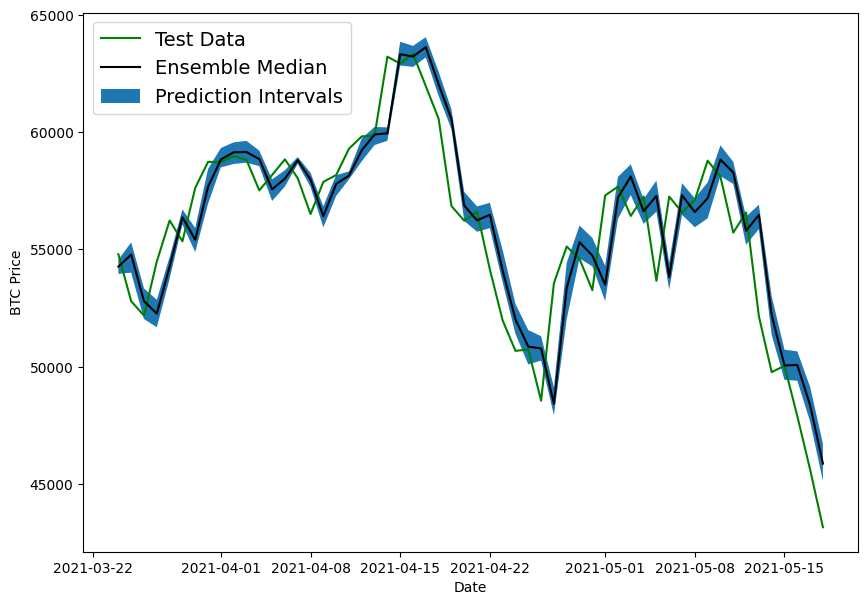

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensamble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

#Make predictions with all the models

In [ ]:
bitcoin_prices_windowed.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop("Price", axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:

# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:

tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

#Make prediction

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [ ]:

# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55477.98828125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55477.98828125] -> Prediction: 51340.27734375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55477.98828125 51340.27734375] -> Prediction: 49031.8828125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55477.98828125 51340.27734375 49031.8828125 ] -> Prediction: 48171.9453125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55477.98828125
 51340.27734375 49031.8828125  48171.9453125 ] -> Prediction: 45955.33984375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31m

In [ ]:
future_forecast[:10]

[55477.99,
 51340.277,
 49031.883,
 48171.945,
 45955.34,
 46814.066,
 48375.1,
 54015.008,
 50020.945,
 47643.8]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps


array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55477.99 , 51340.277, 49031.883, 48171.945, 45955.34 ,
        46814.066, 48375.1  , 54015.008, 50020.945, 47643.8  , 46932.434,
        46525.742, 48929.37 , 50653.19 ], dtype=float32))

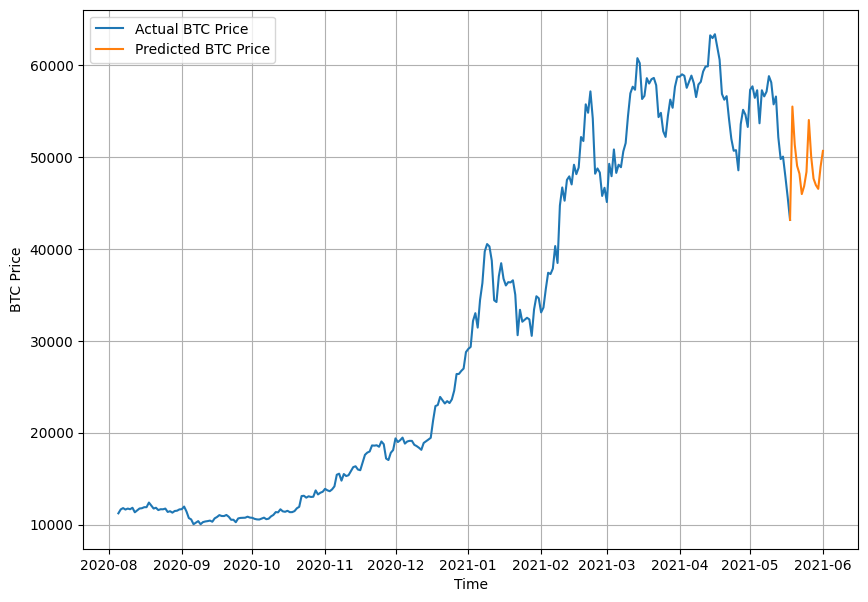

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))

# Ensure both btc_price and bitcoin_prices.index have the same length
btc_price = btc_price[-len(bitcoin_prices.index):]

plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")

# Ensure both future_forecast and next_time_steps have the same length
if len(next_time_steps) > len(future_forecast):
    next_time_steps = next_time_steps[:len(future_forecast)]
elif len(future_forecast) > len(next_time_steps):
    future_forecast = future_forecast[:len(next_time_steps)]

plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

plt.legend()
plt.show()

## MODEL_10: why forecasting is BS(Turkey problem)

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

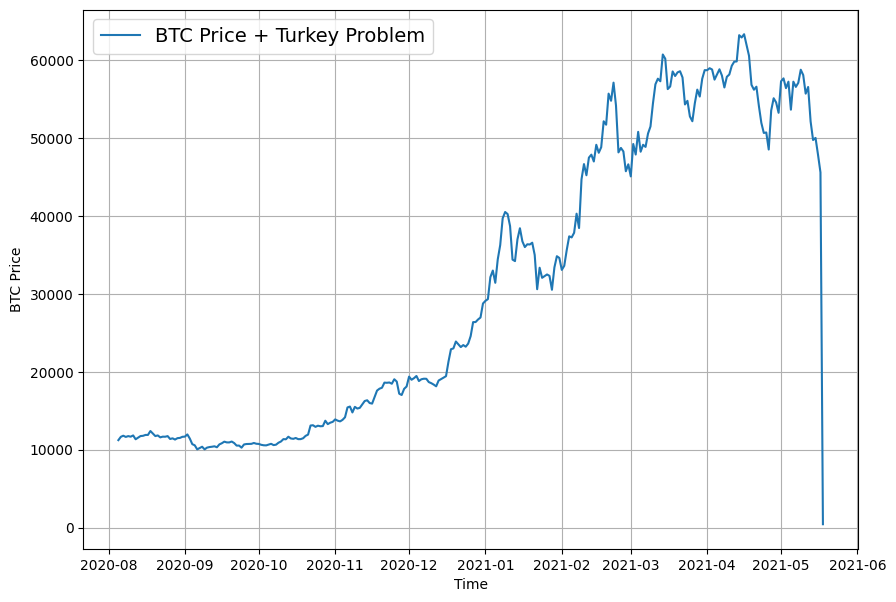

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)


In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])


Epoch 1: val_loss improved from inf to 1151.43933, saving model to model_experiments/model_1_dense.keras

Epoch 2: val_loss improved from 1151.43933 to 1010.72864, saving model to model_experiments/model_1_dense.keras

Epoch 3: val_loss improved from 1010.72864 to 937.62604, saving model to model_experiments/model_1_dense.keras

Epoch 4: val_loss improved from 937.62604 to 851.79694, saving model to model_experiments/model_1_dense.keras

Epoch 5: val_loss improved from 851.79694 to 771.54742, saving model to model_experiments/model_1_dense.keras

Epoch 6: val_loss did not improve from 771.54742

Epoch 7: val_loss improved from 771.54742 to 735.46198, saving model to model_experiments/model_1_dense.keras

Epoch 8: val_loss did not improve from 735.46198

Epoch 9: val_loss did not improve from 735.46198

Epoch 10: val_loss improved from 735.46198 to 697.79370, saving model to model_experiments/model_1_dense.keras

Epoch 11: val_loss improved from 697.79370 to 688.43762, saving model to 

In [ ]:
#evaluate
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 289.4168


640.154296875

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_1_dense.keras")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 287.4110  


637.5283203125

In [ ]:

# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
turkey_results = evaluate_model(y_test, turkey_preds)
turkey_results

{'mae': 637.5284,
 'mse': 4841786.0,
 'rmse': 2200.4058,
 'mape': 21.426088,
 'mase': 26.51972}

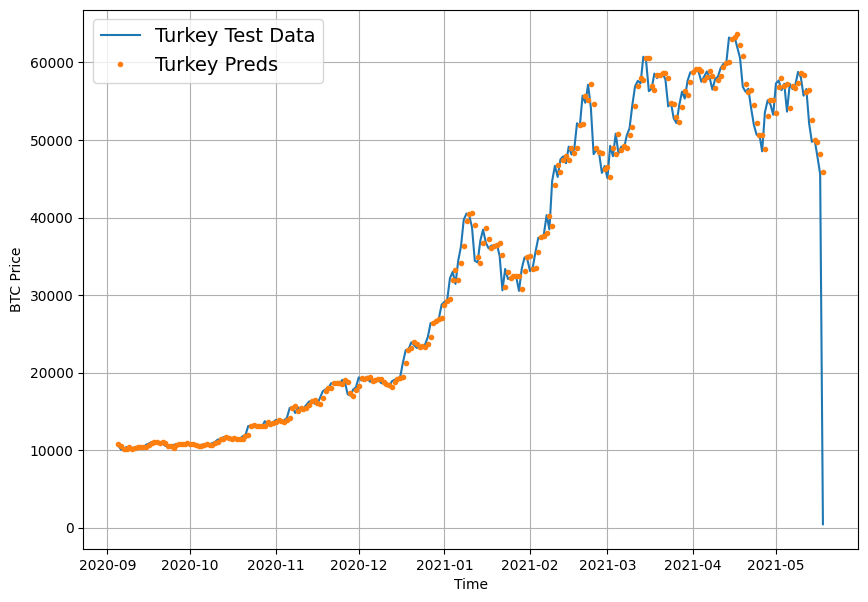

In [ ]:

plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare Models

In [ ]:

# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensamble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,566.403320,1164744.000,1079.233032,2.528747,30.119331
model_2_dense_w30_h1,604.182434,1232230.500,1110.058838,2.735272,30.127100
model_3_dense_w30_h7,1218.904663,5223296.000,2285.453125,5.527694,2.168972
model_4_CONV1D,1216.942749,5087993.000,2255.657959,5.381347,2.137831
model_5_LSTM,695.270630,1631586.875,1277.335815,3.122094,30.107433
model_6_multivariate,570.865295,1177692.125,1085.215210,2.568434,1.002852
model_8_NBEATs,579.777344,1167782.500,1080.639893,2.649272,1.018508
model_9_ensemble,568.677063,1141527.750,1068.422974,2.579397,30.113390
model_10_turkey,637.528381,4841786.000,2200.405762,21.426088,26.519720


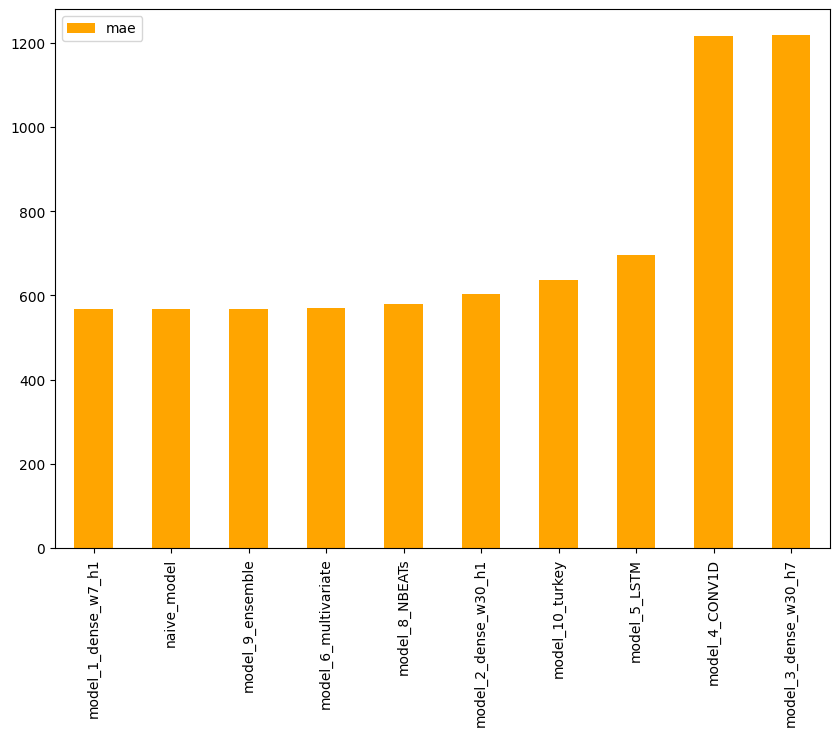

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar", color='Orange');